# V10

Berechnen Sie die Koeffizienten des oben abgebildeten Interpolationspolynoms
\( p(x) = a_4 \cdot x^4 + a_3 \cdot x^3 + a_2 \cdot x^2 + a_1 \cdot x + a_0 \)
zu den fünf Punkten \((0,1), (0.5,1), (1,0), (1.5,0), (2,3)\).
Formulieren Sie dazu die Interpolationsaufgabe als lineares Gleichungssystem für die unbekannten Koeffizienten.
Reproduzieren Sie den obigen Graphen in Python.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [15]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([1, 1, 0, 0, 3])

# Interpolationspolynom
def p(x, a):
    return a[0] + a[1] * x + a[2] * x ** 2 + a[3] * x ** 3 + a[4] * x ** 4
# Koeffizienten
a = np.zeros(5)
# Koeffizientenmatrix
A = np.zeros((5, 5))
# Interpolationsmatrix
for i in range(5):
    for j in range(5):
        A[i, j] = x[i] ** j
# Interpolationsvektor
b = np.zeros(5)
for i in range(5):
    b[i] = y[i]
# LGS lösen
a = np.linalg.solve(A, b)

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


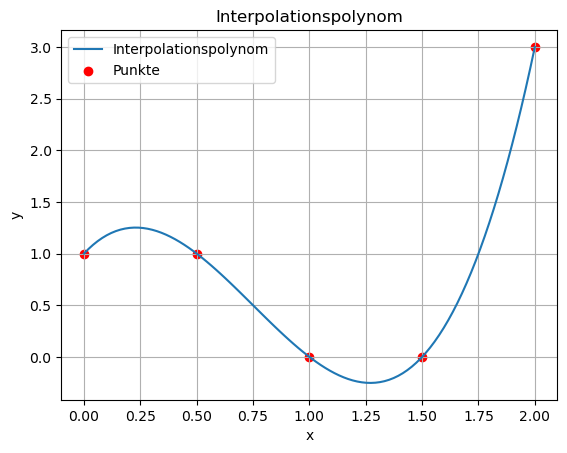

In [6]:
# plotten
x_plot = np.linspace(0, 2, 100)
y_plot = p(x_plot, a)
plt.plot(x_plot, y_plot, label='Interpolationspolynom')
plt.scatter(x, y, color='red', label='Punkte')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolationspolynom')
plt.legend()
plt.grid()
plt.show()

In [9]:
# print function with coefficients
def print_function(a):
    print(f"p(x) = {a[0]} + {a[1]} * x + {a[2]} * x^2 + {a[3]} * x^3 + {a[4]} * x^4")
print_function(a)

p(x) = 1.0 + 2.333333333333334 * x + -6.0 * x^2 + 2.6666666666666665 * x^3 + -0.0 * x^4


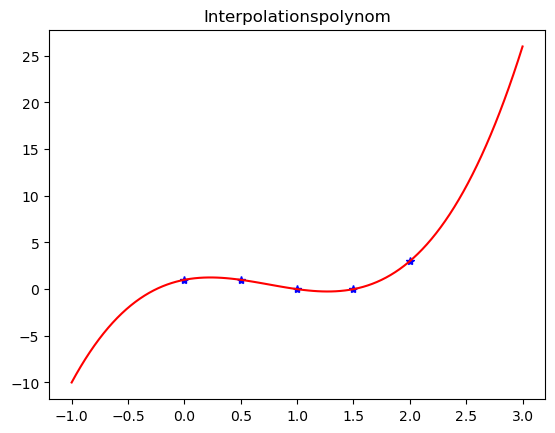

p(x) = -6.661338147750939e-16 + 2.6666666666666696 * x + -6.0000000000000036 * x^2 + 2.3333333333333344 * x^3 + 1.0 * x^4


In [10]:
# Interpolationsdaten
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([1, 1, 0, 0, 3])

# Berechnung der Koeffizienten des Interpolationspolynoms
V = np.vander(x)
p = np.linalg.solve( V, y )
# Vergleichsplot
xx = np.linspace( -1, 3, 100 )
yy = np.polyval( p, xx )
plt.plot( x, y, 'b*', xx, yy, 'r' )
plt.title( 'Interpolationspolynom' )
plt.show()

# print function with coefficients
def print_function(a):
    print(f"p(x) = {a[0]} + {a[1]} * x + {a[2]} * x^2 + {a[3]} * x^3 + {a[4]} * x^4")
print_function(p)

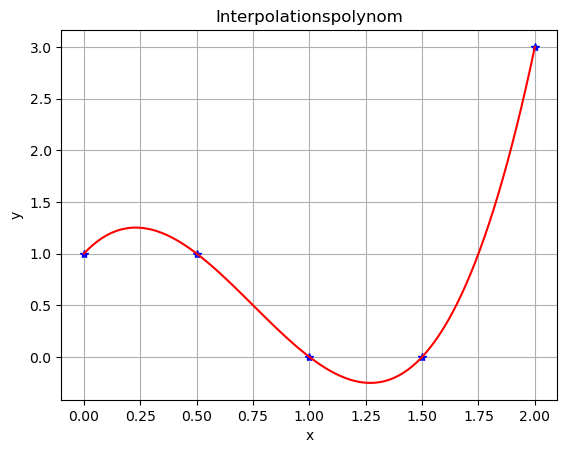

In [11]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([1, 1, 0, 0, 3])

V = np.vander(x)
p = np.linalg.solve( V, y )

# Vergleichsplot
xx = np.linspace(0, 2, 100)
yy = np.polyval(p, xx)
plt.plot(x, y, 'b*', xx, yy, 'r')
plt.title('Interpolationspolynom')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

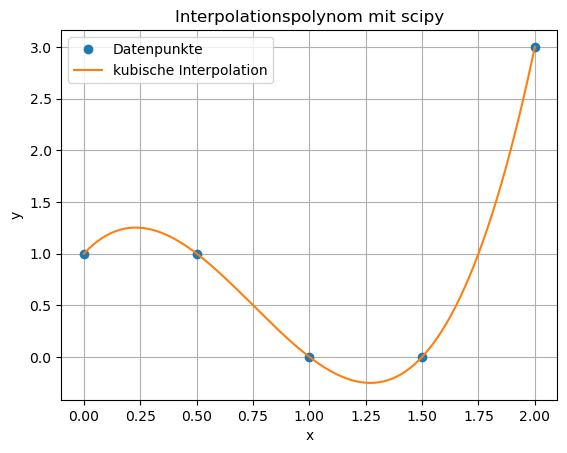

In [19]:
f = sp.interpolate.interp1d(x, y, kind='cubic')

xx = np.linspace(0, 2, 200)
yy = f(xx)

plt.plot(x, y, 'o', label='Datenpunkte')
plt.plot(xx, yy, '-', label='kubische Interpolation')
plt.title('Interpolationspolynom mit scipy')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

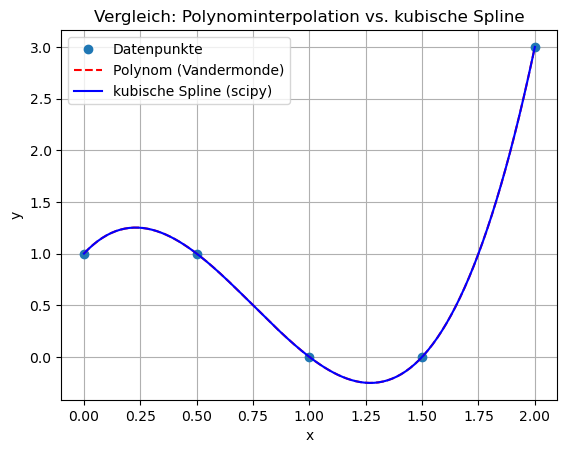

In [13]:
# Globales Interpolationspolynom (Vandermonde)
V = np.vander(x)
p = np.linalg.solve(V, y)
xx = np.linspace(0, 2, 200)
yy_poly = np.polyval(p, xx)

# Kubische Spline-Interpolation
f = sp.interpolate.interp1d(x, y, kind='cubic')
yy_spline = f(xx)

# Plot
plt.plot(x, y, 'o', label='Datenpunkte')
plt.plot(xx, yy_poly, 'r--', label='Polynom (Vandermonde)')
plt.plot(xx, yy_spline, 'b-', label='kubische Spline (scipy)')
plt.title('Vergleich: Polynominterpolation vs. kubische Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [14]:
mid = (x[:-1] + x[1:]) / 2  # midpoints
poly_vals = np.polyval(p, mid)
spline_vals = f(mid)

diff = poly_vals - spline_vals
poly_vals, spline_vals, diff

# pretty print in table format
import pandas as pd
df = pd.DataFrame({
    'Midpoint': mid,
    'Polynomial Value': poly_vals,
    'Spline Value': spline_vals,
    'Difference': diff
})
print(df.to_string(index=False))

 Midpoint  Polynomial Value  Spline Value    Difference
     0.25              1.25          1.25  2.220446e-16
     0.75              0.50          0.50 -2.220446e-16
     1.25             -0.25         -0.25 -4.440892e-16
     1.75              1.00          1.00  0.000000e+00
